In [2]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt 
from BNT import BNT




In [3]:
#setup for a Euclid-like survey
z_euc = 0.9 / 2 ** 0.5
def n(z, z_euc):
	return (z / z_euc) ** 2. * np.exp(-(z / z_euc) ** 1.5)

#create an initial z and n(z) sampled at 100 pts
n_pts = 100
z = np.linspace(0.001, 4., n_pts)
nz = n(z, z_euc) / np.trapz(n(z, z_euc), z)




In [4]:
#make the tomographic bins and put in a big list
#z indices of boundary points. Approx equal gals per bin and put n_i in a list
z_idx = np.array([0, 16 , 22 , 27 , 31 , 35 , 40 , 46 , 51, 63, 100])
n_i_list = []
for i in range(10):
    n_i = np.zeros(n_pts)
    n_i[z_idx[i]: z_idx[i+1]] = nz[z_idx[i]: z_idx[i+1]]
    #smooth with Gaussian Kernel
    sigma = 0.05 * (1. + z)
    znew = z.copy()
    gauss_kernel_mat = 1. / sigma[None,:] * np.exp(- (znew[:,None] - z[None,:] ) ** 2. / (2 * sigma[None,:]))
    n_i = np.dot(gauss_kernel_mat, n_i)
    n_i = n_i / np.trapz(n_i, z)
    n_i_list += [n_i]

In [5]:
# load background geometry and interpolate onto z
chi_load= np.loadtxt('chi.txt')
z_load = np.loadtxt('z.txt')
chi = np.interp(z, z_load, chi_load)
a = 1 / (1+z)


In [6]:
#compute the BNT matrix
B = BNT(z, chi, n_i_list)
BNT_matrix = B.get_matrix()
print (BNT_matrix)



[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-1.          1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.14019508 -1.14019508  1.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.2794538  -1.2794538   1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.41943488 -1.41943488  1.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.6678116  -1.6678116   1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.81922164 -1.81922164
   1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.7540171
  -1.7540171   1.          0.          0.        ]
 [ 0.          0.          0.          0.        

In [7]:
#create the lensing kernels q_i with no prefactor and prob not normalised correcectly...
q_i_list = []
for i in range(10):
	q_i = np.zeros(n_pts)
	n_i = n_i_list[i]
	for j in range(n_pts):
		delta_chi = np.zeros(n_pts)
		for i in range(n_pts - 1):
			delta_i = chi[i+1] - chi[i]
		q_i[j] = chi[j] / a[j] * np.sum(n_i[j:] * (chi[j:] - chi[j]) / chi[j:])
	q_i_list += [q_i]




In [8]:
#create the BNT weighted kernels
q_i_array = np.array(q_i_list)
q_i_BNT_array = np.zeros_like(q_i_array)
for j in range(n_pts):
	q_i_BNT_array[:,j] = np.dot(BNT_matrix, q_i_array[:,j])

Text(24.90908501907542, 0.5, '$ n(z)$')

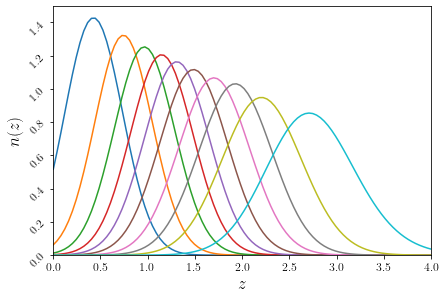

In [9]:
#plot n(z)
#from matplotlib import rc
#plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=12)
#plt.rc('ytick', labelsize=12)
#plt.rc('axes', labelsize=17)
#params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
#plt.rcParams.update(params)


for i in range(10):
    ni = n_i_list[i] 
    plt.plot(z, ni)
plt.ylim(ymin = 0.)
plt.xlim(xmin = 0., xmax = 4.)
plt.yticks(rotation=45)
plt.tight_layout()
plt.xlabel('$z$')
plt.ylabel('$ n(z)$')

Text(24.90908501907542, 0.5, '$q^j (z)$')

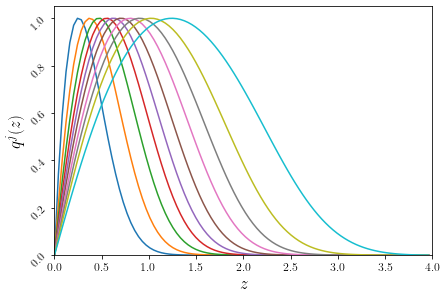

In [10]:
#plot the untransformed kernels
#from matplotlib import rc
#plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=12)
#plt.rc('ytick', labelsize=12)
#plt.rc('axes', labelsize=17)
#params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
#plt.rcParams.update(params)


for i in range(10):
    mx = np.max(np.array(q_i_list[i]))
    qi = q_i_list[i] / mx
    qi[np.where(qi == 0)] = -0.01
    plt.plot(z, qi)
plt.ylim(ymin = 0.)
plt.xlim(xmin = 0., xmax = 4.)
#plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.xlabel('$z$')
plt.ylabel('$q^j (z)$')



Text(24.90908501907542, 0.5, '$\\tilde q^j (z)$')

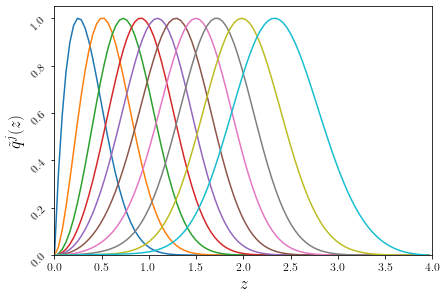

In [11]:
#plot the transformed kernels
from matplotlib import rc
#plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
#plt.rc('xtick', labelsize=12)
#plt.rc('ytick', labelsize=12)
#plt.rc('axes', labelsize=17)
#params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
#plt.rcParams.update(params)

mx = np.max(np.array(q_i_BNT_array))
for i in range(10):
    mx = np.max(np.array(q_i_BNT_array[i]))
    qi = q_i_BNT_array[i] / mx
    qi[np.where(qi == 0)] = -0.01
    plt.plot(z, qi)
plt.ylim(ymin = 0.)
plt.xlim(xmin = 0., xmax = 4.)
#plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.xlabel('$z$')
plt.ylabel(r'$\tilde q^j (z)$')